# The simplest nerual network

Predicting the relationship between  
0 0 1 -> 0  
0 1 1 -> 0   
1 0 1 -> 1  
1 1 1 -> 1  


In [5]:
import numpy as np

# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

# output dataset            
y = np.array([[0,0,1,1]]).T

The input data contain 3 number, each being either a one or zero.  
The output data is one or zero corresponding to the input data in a "certain" relationship

In [6]:
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [7]:
y

array([[0],
       [0],
       [1],
       [1]])

0 0 1 -> 0  
0 1 1 -> 0   
1 0 1 -> 1  
1 1 1 -> 1  


Notice that the first column correspond directly with the output.


In [11]:
np.random.seed(10)

# random weights are being initialize  
syn0 = 2*np.random.random((3,1)) - 1

#iteration
for iter in range(10000):

    # forward propagation
    
    # first layer, layer 0 . The input layer
    l0 = X
    # the hidden layer. With the activation function sigmoid.
    l1 = nonlin(np.dot(l0,syn0))
    
    if (iter <= 1000 and iter % 100 ==0):
        print(iter)
        print(l1)
    # backward propagration
    l1_error = y - l1

    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)
print("result")
print (l1)

0
[[ 0.56642907]
 [ 0.33376626]
 [ 0.69209624]
 [ 0.46292857]]
100
[[ 0.11696839]
 [ 0.08695213]
 [ 0.93139185]
 [ 0.90706346]]
200
[[ 0.07778048]
 [ 0.05996051]
 [ 0.95205137]
 [ 0.93756417]]
300
[[ 0.06174827]
 [ 0.04828883]
 [ 0.96118912]
 [ 0.95023332]]
400
[[ 0.05258563]
 [ 0.04144841]
 [ 0.96659507]
 [ 0.95752337]]
500
[[ 0.04649997]
 [ 0.03683727]
 [ 0.97025888]
 [ 0.96238485]]
600
[[ 0.04209358]
 [ 0.03346519]
 [ 0.97294769]
 [ 0.96591444]]
700
[[ 0.03871866]
 [ 0.03086385]
 [ 0.97502723]
 [ 0.96862316]]
800
[[ 0.03602951]
 [ 0.02877972]
 [ 0.97669653]
 [ 0.97078475]]
900
[[ 0.033823  ]
 [ 0.02706221]
 [ 0.97807429]
 [ 0.97256053]]
1000
[[ 0.03197105]
 [ 0.0256156 ]
 [ 0.97923618]
 [ 0.97405244]]
result
[[ 0.00967084]
 [ 0.00786064]
 [ 0.9935941 ]
 [ 0.99211624]]


shown here that over the first thousand iteration,  
the first two weights are approching 0.
While the last two weights are approching 1.
Which matches with our expected output: 0 0 1 1


# next problem : Predicting the standard deviation using data from a pervious time frame

# our data set
HSI  - 200 datapoint

24578.42969	4/26/2017  
24698.48047	4/27/2017  
24615.13086	4/28/2017  
24696.13086	5/2/2017  
...          ...

In [4]:
import numpy as np
#numpy , array processing such as element  wise addition
import matplotlib.pyplot as plt
#matplotlib, plotting
import pandas
from pandas import Series , DataFrame, Panel
#pandas, data processing  such as conveting datetime or reading csv
import math
#self explanatory

#keras, network building
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

Using TensorFlow backend.


In [28]:
#seeding
np.random.seed(7)
#moving window of 29 days
look_back = 29

In [29]:
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[0], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

Splitting the data into training test and testing test using a 80% split.  
The data range for the testing test is actually from the 80% cuttof - 29 to the very last data.  
Since the 29 data prior to the cutoff will produce the first prediction directly on the cut.

In [30]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size-look_back-1:len(dataset),:]
len(train), len(test)

(159, 70)

159 training datapoint, 70 testing data point =  229 = 200+29 as expected

In [31]:
def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                mean = np.mean(a)
                # newstd = np.std(np.append(a,dataset[i+look_back+1]))
                a = a -mean
                dataX.append(a)
                dataY.append(dataset[i+look_back+1])
        return np.array(dataX), np.array(dataY)

The function that convert our dataset into a moving window time frame

In [32]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
trainX[:3] , trainY[:3]

(array([[-938.70117188, -865.26171875, -603.76171875, -446.00195312,
         -621.95117188, -170.66015625, -251.73046875,  -97.77148438,
         -315.890625  ,  109.6484375 ,  303.51953125,  292.37890625,
          394.55859375,  140.77929688, -129.16015625, -226.84179688,
         -142.45117188,   52.65820312,  -99.02148438,  317.16992188,
          611.23828125,  585.45898438,  684.83984375,  676.34960938,
          303.79882812,  272.06835938,  295.578125  ,  -99.18164062,
          -31.66015625],
        [-897.52929688, -636.02929688, -478.26953125, -654.21875   ,
         -202.92773438, -283.99804688, -130.0390625 , -348.15820312,
           77.38085938,  271.25195312,  260.11132812,  362.29101562,
          108.51171875, -161.42773438, -259.109375  , -174.71875   ,
           20.390625  , -131.2890625 ,  284.90234375,  578.97070312,
          553.19140625,  652.57226562,  644.08203125,  271.53125   ,
          239.80078125,  263.31054688, -131.44921875,  -63.92773438,
         

the dataset X contain 29 data, repersenting the t-29 to t-1 datapoint. the dataset Y contain the actual value of T

# Building the network

In [34]:
model = Sequential()
model.add(Dense(20,input_dim=look_back, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='linear'))


The network is in the form of [20]->[10]->[1]

In [35]:
epoch=200
model.compile(loss='mean_absolute_percentage_error', optimizer='adam')
model.fit(trainX, trainY, epochs=epoch, batch_size=1, verbose=2)
##
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
##


Epoch 1/200
3s - loss: 96.8689
Epoch 2/200
0s - loss: 76.0628
Epoch 3/200
0s - loss: 42.8347
Epoch 4/200
0s - loss: 39.5718
Epoch 5/200
0s - loss: 35.8075
Epoch 6/200
0s - loss: 31.4892
Epoch 7/200
0s - loss: 28.1806
Epoch 8/200
0s - loss: 24.8608
Epoch 9/200
0s - loss: 20.7488
Epoch 10/200
0s - loss: 17.7475
Epoch 11/200
0s - loss: 16.0480
Epoch 12/200
0s - loss: 15.2954
Epoch 13/200
0s - loss: 14.9681
Epoch 14/200
0s - loss: 14.5486
Epoch 15/200
0s - loss: 14.3468
Epoch 16/200
0s - loss: 14.2824
Epoch 17/200
0s - loss: 13.8826
Epoch 18/200
0s - loss: 13.4990
Epoch 19/200
0s - loss: 13.6120
Epoch 20/200
0s - loss: 12.9972
Epoch 21/200
0s - loss: 12.8538
Epoch 22/200
0s - loss: 12.6530
Epoch 23/200
0s - loss: 12.5225
Epoch 24/200
0s - loss: 12.1433
Epoch 25/200
0s - loss: 11.7461
Epoch 26/200
0s - loss: 11.6449
Epoch 27/200
0s - loss: 11.3591
Epoch 28/200
0s - loss: 11.2034
Epoch 29/200
0s - loss: 10.9099
Epoch 30/200
0s - loss: 10.5036
Epoch 31/200
0s - loss: 10.3567
Epoch 32/200
0s -

In [36]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict[:3]

array([[ 19434.58789062],
       [ 19319.54492188],
       [ 19664.84570312]], dtype=float32)

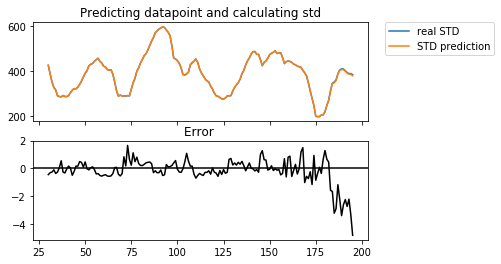

In [40]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+look_back:len(dataset)-1, :] = testPredict
#########################################



#axarr[0].plot(dataset , label = 'data')
#axarr[0].plot(trainPredictPlot,label = 'training')
#axarr[0].plot(testPredictPlot, label = 'testing')


#plt.plot(futurePredictPlot)
f, axarr = plt.subplots(2,sharex=True,squeeze=False)

axarr = axarr.flatten()
#predicting the STD using predicted data point
predictionX , PredictionY = create_dataset(dataset,look_back)
prestack1  = predictionX
datatodate = prestack1
np.delete(prestack1,look_back-1,axis =1)

prediction = model.predict(predictionX)
value = np.hstack((prestack1,prediction))



####
Rstd  = np.empty(len(dataset))
Rstd  [:] = np.nan
Rstd [look_back+1:] = np.std(datatodate, axis=1)

axarr[0].plot(Rstd,label = "real STD")
#

std  = np.empty(len(dataset))
std  [:] = np.nan
std [look_back+1:]= np.std(value,axis = 1,)
axarr[0].plot(std, label = 'STD prediction')


#axarr[0].plot(np.std(stdPrep,axis=1), label = 'stdiance prediction for training data')
#axarr[0].plot(np.std(stdPrep2,axis=1),label = 'stdiance prediction for testing data')


axarr[0].set_title("Predicting datapoint and calculating std")
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Data = Series(dataset, index = dates)
#Series.rolling(Data,window=3,center=False).mean().plot(style='b--')
#Series.rolling(Data,window=3,center=False).std().plot(style='r--')
#Data.plot(style='k'




error = std - Rstd
axarr[1].plot(error, '-k')
axarr[1].set_title('Error ')
axarr[1].axhline(0, color='black')
plt.show()


# Predicting the STD directly

156 70
Epoch 1/200
0s - loss: 45512.1614
Epoch 2/200
0s - loss: 13997.1344
Epoch 3/200
0s - loss: 8196.1250
Epoch 4/200
0s - loss: 6298.3014
Epoch 5/200
0s - loss: 4933.2715
Epoch 6/200
0s - loss: 3958.0924
Epoch 7/200
0s - loss: 3102.1540
Epoch 8/200
0s - loss: 2623.7782
Epoch 9/200
0s - loss: 2159.1840
Epoch 10/200
0s - loss: 1913.2046
Epoch 11/200
0s - loss: 1592.2664
Epoch 12/200
0s - loss: 1488.4446
Epoch 13/200
0s - loss: 1300.7316
Epoch 14/200
0s - loss: 1098.1141
Epoch 15/200
0s - loss: 1045.9737
Epoch 16/200
0s - loss: 847.5275
Epoch 17/200
0s - loss: 848.5649
Epoch 18/200
0s - loss: 758.4416
Epoch 19/200
0s - loss: 702.2026
Epoch 20/200
0s - loss: 639.9388
Epoch 21/200
0s - loss: 618.3372
Epoch 22/200
0s - loss: 557.1442
Epoch 23/200
0s - loss: 474.5014
Epoch 24/200
0s - loss: 506.1389
Epoch 25/200
0s - loss: 421.2635
Epoch 26/200
0s - loss: 450.9004
Epoch 27/200
0s - loss: 361.0363
Epoch 28/200
0s - loss: 371.7023
Epoch 29/200
0s - loss: 383.3538
Epoch 30/200
0s - loss: 361.

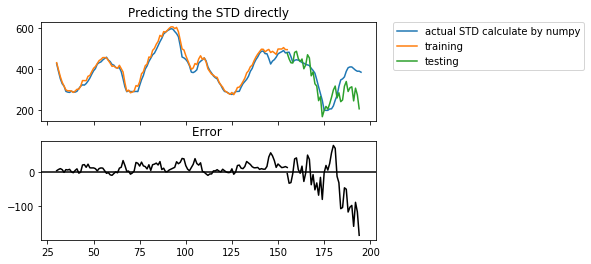

In [41]:

import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import metrics
import plotly.plotly as py
import plotly.tools as tls


look_back = 29
epoch = 200

np.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[0], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size-look_back-1:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                mean = np.mean(a)
                newstd = np.std(np.append(a,dataset[i+look_back+1]))
                a = a -mean
                dataX.append(a)
                dataY.append(newstd)
        return np.array(dataX), np.array(dataY)
##


f, axarr = plt.subplots(2,sharex=True,squeeze=False)

axarr = axarr.flatten()
def create_dataset2(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]



                dataX.append(a)
                dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)



###
predictionX , PredictionY = create_dataset2(dataset,look_back)
prestack1 ,prestack2  = predictionX, PredictionY
Rstd  = np.empty(len(dataset))
Rstd  [:] = np.nan
Rstd [look_back+1:]= np.std(prestack1, axis=1)


axarr[0].plot(Rstd, label = 'actual STD calculate by numpy')
###


trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


def mean(dataset):
        return np.mean(datas)
model = Sequential()
model.add(Dense(20,input_dim=look_back, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1,activation='linear'))



model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=epoch, batch_size=2, verbose=2)



trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back+1:len(trainPredict)+look_back+1, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+look_back:len(dataset)-1, :] = testPredict



#axarr[0].plot(dataset,label = "dataset")

axarr[0].plot(trainPredictPlot,label = 'training')
axarr[0].plot(testPredictPlot, label = 'testing')
axarr[0].set_title("Predicting the STD directly")
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



error = trainPredictPlot.flatten() - Rstd
error2= testPredictPlot.flatten() - Rstd
axarr[1].plot(error, '-k')
axarr[1].plot(error2, '-k')
axarr[1].set_title('Error ')
axarr[1].axhline(0, color='black')
plt.show()

model.save('C:\\Users\\tcheng\\Documents\HSI1.h5')

Using TensorFlow backend.
C:\Users\tcheng\AppData\Local\Programs\Python\Python35\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Generation 0
Epoch 1/1
8s - loss: 42.2904
Generation 1
Epoch 1/1
1s - loss: 34.9078
Generation 2
Epoch 1/1
1s - loss: 33.0272
Generation 3
Epoch 1/1
1s - loss: 51.6439
Generation 4
Epoch 1/1
1s - loss: 45.4743
Generation 5
Epoch 1/1
1s - loss: 53.1385
Generation 6
Epoch 1/1
1s - loss: 55.7371
Generation 7
Epoch 1/1
1s - loss: 54.7616
Generation 8
Epoch 1/1
1s - loss: 49.9752
Generation 9
Epoch 1/1
1s - loss: 51.1548
Generation 10
Epoch 1/1
1s - loss: 44.5299
Generation 11
Epoch 1/1
1s - loss: 48.4805
Generation 12
Epoch 1/1
1s - loss: 41.5045
Generation 13
Epoch 1/1
1s - loss: 48.7004
Generation 14
Epoch 1/1
1s - loss: 44.6838
Generation 15
Epoch 1/1
1s - loss: 41.0069
Generation 16
Epoch 1/1
1s - loss: 38.5297
Generation 17
Epoch 1/1
1s - loss: 40.2038
Generation 18
Epoch 1/1
0s - loss: 31.6101
Generation 19
Epoch 1/1
1s - loss: 37.4788
Generation 20
Epoch 1/1
1s - loss: 39.3938
Generation 21
Epoch 1/1
1s - loss: 47.6253
Generation 22
Epoch 1/1
1s - loss: 40.6783
Generation 23
Epoch 1

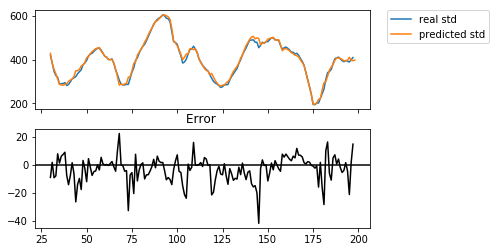

In [1]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
import pandas
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np

look_back = 29
np.random.seed(10)
# frame a sequence as a supervised learning problem


dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[0], engine='python')
datasets = dataframe.values
dataset = datasets.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
dataset= scaler.fit_transform(dataset)


def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]
                mean = np.mean(a)
                # newstd = np.std(np.append(a,dataset[i+look_back+1]))
                a = a -mean
                dataX.append(a)
                dataY.append(dataset[i+look_back+1])
        return np.array(dataX), np.array(dataY)
# split into train and test sets
train_size = int(len(dataset) * 1)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]#, dataset[train_size-look_back-1:len(dataset),:]
#print(len(train), len(test))


############


trainX, trainY = create_dataset(train,look_back)
#testX, testY = create_dataset(test,look_back)
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0],1, testX.shape[1]))

#print(trainX)
batch_size  = 1
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = trainX, trainY
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(1, X.shape[1], X.shape[2]), return_sequences =True ,stateful = True))
    model.add(Dropout (0.2))
    model.add(LSTM(neurons, batch_input_shape=(1, X.shape[1], X.shape[2]), return_sequences =False,stateful = True))
    model.add(Dense(output_dim=1))
    model.compile(loss='mean_absolute_percentage_error', optimizer='adam')
    for i in range(nb_epoch):
        print('Generation %d' % (i))
        model.fit(X, y, epochs=1, batch_size=1, verbose=2, shuffle=False)
        model.reset_states()
    return model

lstm_model = fit_lstm(trainX, 1,500 , 29)
trainPredict = lstm_model.predict(trainX, batch_size = batch_size)
lstm_model.reset_states()
#testPredict = lstm_model.predict(testX, batch_size = batch_size)
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back+1:] = scaler.inverse_transform(trainPredict)
#testPredictPlot = np.empty_like(dataset)
#testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+look_back:len(dataset)-1, :] = scaler.inverse_transform(testPredict)



#plt.plot(datasets , label = "dataset")
#plt.plot(trainPredictPlot , label = "trainPredict")

def moving_window(dataset, look_back=1):
        dataX = []
        for i in range(len(dataset)-look_back-1):
                a = dataset[i:(i+look_back), 0]

                dataX.append(a)
        return np.array(dataX)



Rstd = moving_window(datasets, look_back+1)
std =  moving_window(datasets, look_back)

np.delete(std,look_back-1,axis =1)

std = np.hstack((std,scaler.inverse_transform(trainPredict)))



f, axarr = plt.subplots(2,sharex=True,squeeze=False)

axarr = axarr.flatten()
RRstd = np.empty(len(dataset))
RRstd[:] = np.nan
RRstd[look_back+1:-1] = np.std(Rstd, axis = 1 )


Std = np.empty(len(dataset))
Std[:] = np.nan
Std[look_back+1:] = np.std(std , axis = 1)


axarr[0].plot(RRstd, label= "real std")
axarr[0].plot(Std, label = 'predicted std')

#plt.plot(testPredictPlot , label = "testPredict")

axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


error = np.subtract(RRstd, Std)
axarr[1].plot(error, '-k')
axarr[1].set_title('Error ')
axarr[1].axhline(0, color='black')
plt.show()
